In [1]:
import scipy.integrate as spi
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [65]:
INPUT

(0.999, 0.999, 0.999, 0.001, 0.001, 0.001)

In [77]:
f=1.5
b=0.3
r=0.4
alpha=0.5

nu=mu=np.array([1/(70*365),1/(70*365),1/7])
gamma=np.array([1/14,1/14,1/7])
beta=b*np.array([[f,f,0],[1,1,1],[1,1,0]])



ND=80
TS=0.1
I0=np.array([1e-3,1e-3,1e-3])
S0=1-I0
INPUT = (S0[0],I0[0],S0[1],I0[1],S0[2],I0[2])

def diff_eqs(t,z):  
    S1,I1,S2,I2,S3,I3=z
    return [nu[0]-S1*(beta[0,0]*I1+beta[0,1]*I2+r*beta[0,2]*I3)+I1*(gamma[0]+alpha*S1)-mu[0]*S1, 
            S1*(beta[0,0]*I1+beta[0,1]*I2+r*beta[0,2]*I3)-I1*(gamma[0]+alpha*S1)-mu[0]*I1,
            
            nu[1]-S2*(beta[1,0]*I1+beta[1,1]*I2+r*beta[1,2]*I3)+I2*(gamma[1]+alpha*S1)-mu[1]*S2 ,
            S2*(beta[1,0]*I1+beta[1,1]*I2+r*beta[1,2]*I3)-I2*(gamma[1]+alpha*S1)-mu[1]*I2,

            nu[2]-S3*(beta[2,0]*I1+beta[2,1]*I2+beta[2,2]*I3)-mu[2]*S3,
            S3*(beta[2,0]*I1+beta[2,1]*I2+beta[2,2]*I3)-mu[2]*I3-gamma[2]*I3]




t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)


RES= solve_ivp(diff_eqs,t_span=(0,ND),t_eval=t_range,y0=INPUT,method='LSODA')

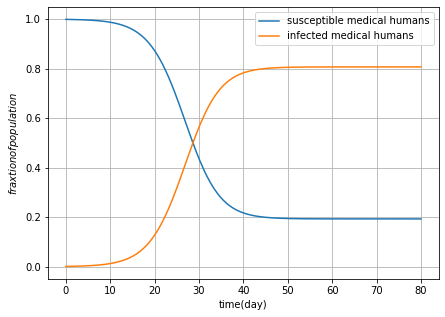

In [93]:
plt.figure(figsize=(7,5))
plt.plot(RES.t,RES.y[0],label='susceptible medical humans')
plt.plot(RES.t,RES.y[1],label='infected medical humans')
plt.ylabel('$fraxtion of population$')
plt.xlabel('time(day)')
#plt.title('infected mosquitoes vs time')
#plt.title('susceptible humans vs time')
plt.grid()
plt.legend()
plt.savefig('sus h.png',bbox_inches='tight')


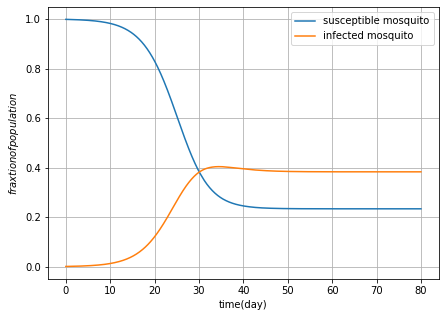

In [92]:
plt.figure(figsize=(7,5))
plt.plot(RES.t,RES.y[4],label='susceptible mosquito')
plt.plot(RES.t,RES.y[5],label='infected mosquito')
plt.ylabel('$fraxtion of population$')
plt.xlabel('time(day)')
#plt.title('infected mosquitoes vs time')
#plt.title('susceptible humans vs time')
plt.grid()
plt.legend()
plt.savefig('mos.png',bbox_inches='tight')

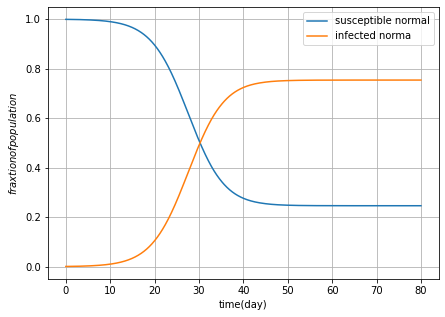

In [94]:
plt.figure(figsize=(7,5))
plt.plot(RES.t,RES.y[2],label='susceptible normal')
plt.plot(RES.t,RES.y[3],label='infected norma')
plt.ylabel('$fraxtion of population$')
plt.xlabel('time(day)')
#plt.title('infected mosquitoes vs time')
#plt.title('susceptible humans vs time')
plt.grid()
plt.legend()
plt.savefig('norma.png',bbox_inches='tight')